# Introduction

Long-term beach datasets that quantify the changes in sandy beaches are rare. Scientists apart of the Narrabeen-Collaroy Beach Historical Survey Program began collecting data in 1979. Up until the year 2005, all profile measurements were made on-sight using traditional survey methods. From 2005 on, the measurements were made with more precision with the adoption of GPS measurements. The data includes bathymetry profiles of the shoreline, astronomical tide data, inshore wave data, and profile data at 5 locations along the beach. The data is constantly being updated and is available for download on the following website: http://narrabeen.wrl.unsw.edu.au. 

# Objective

The goal of this notebook is to import the profile dataset and obtain the shoreline positions. In addition the most efficient interpolation method will be determined as the profile dataset is not evenly sampled.

In [1]:
run forecastingModules.py

In [2]:
%matplotlib inline

<img src="profile_image.jpg" width="350">

In [3]:
# imports the profile dataset

profile = grab_profileData('Narrabeen_Profiles.csv')

In [4]:
# view of the profile dataset and the information that is contained

profile.head()

,Site,Profile ID,Date,Chainage,Elevation,Flag
0,NARRA,PF4,1976-04-27,0,9.52,EMERY
1,NARRA,PF4,1976-04-27,10,7.12,EMERY
2,NARRA,PF4,1976-04-27,20,5.88,EMERY
3,NARRA,PF4,1976-04-27,30,3.88,EMERY
4,NARRA,PF4,1976-04-27,40,1.56,EMERY


In [5]:
# the selectProfile function takes the dataframe above and isolates the specified location
# it returns 4 dataframes all corresponding to the specific location

pf1, chain_df, elev_df, date_df = selectProfile(profile,'PF1')

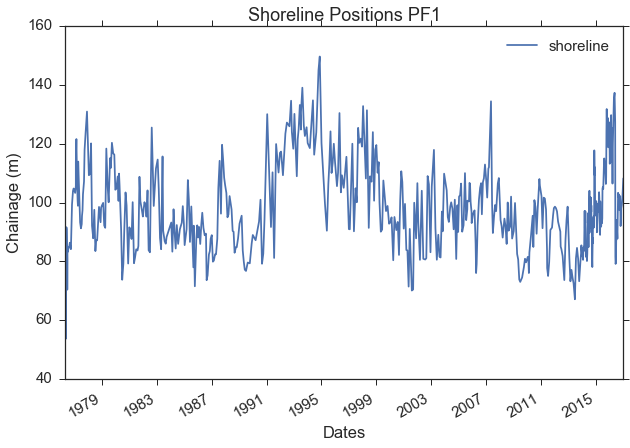

In [6]:
# the shorelinePositions function takes the above dataframes and determines the actual shoreline
# positions. It returns 1 dataframe with the corresponding shoreline positions and also plots
# the data below.

shoreline = shorelinePositions(pf1,chain_df, elev_df, date_df, 'PF1')

**In the years 1979-2005, the sampling methods that were used were only recorded once or twice every month. The data from 2006-present was recorded more often so from here on, the shoreline data will be from 2006-present.**

In [7]:
# The optimize function accepts the shoreline dataframe and then determines how many values of
# the shoreline dataframe are interpolated values or actual values. The value of 12 represents
# the resampling method in days. It is currently set to resample every 12 days.

optimize(shoreline[320:], 12)

Precent of actual values:         54.3661971831
Percent of interpolated values:   45.6338028169
Number of days to resample by:    12
Number of data entries:           355


                           Types of Interpolation

Linear
Cubic
nearest
pchip
quadratic
slinear
polynomial

Enter Method of Interpolation: all



Linear Interpolation: 
     ignore the index and treat the values as equally spaced.


Cubic Interpolation: 
     Interpolate data with a piecewise cubic polynomial which is twice continuously differentiable


nearest Interpolation: 
     Nearest-neighbour interpolation.


pchip Interpolation: 
     x and y are arrays of values used to approximate some function f, with y = f(x). The interpolant uses
     monotonic cubic splines to find the value of new points. (PCHIP stands for Piecewise Cubic Hermite
     Interpolating Polynomial).


quadratic Interpolation: 
      quadratic and cubic refer to a spline interpolation of first, second or third order


sLinear Interpolation: 
     spline of order 1 interpolation.


polynomial Interpolation: 
     4th order polynomial interpolation.




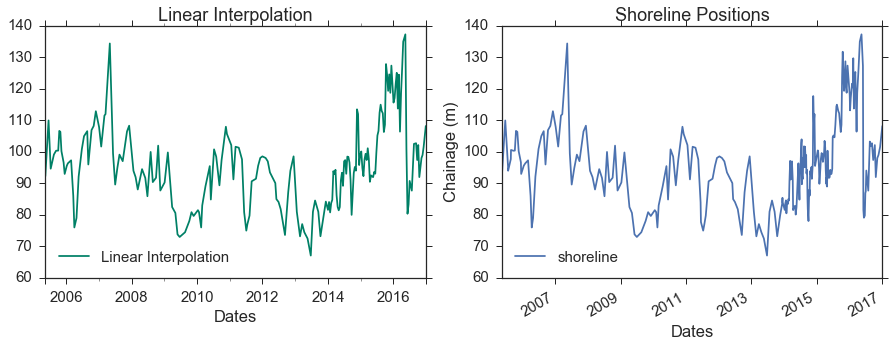

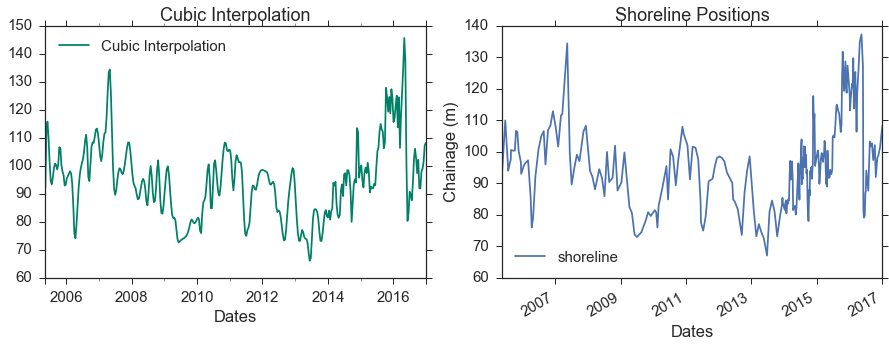

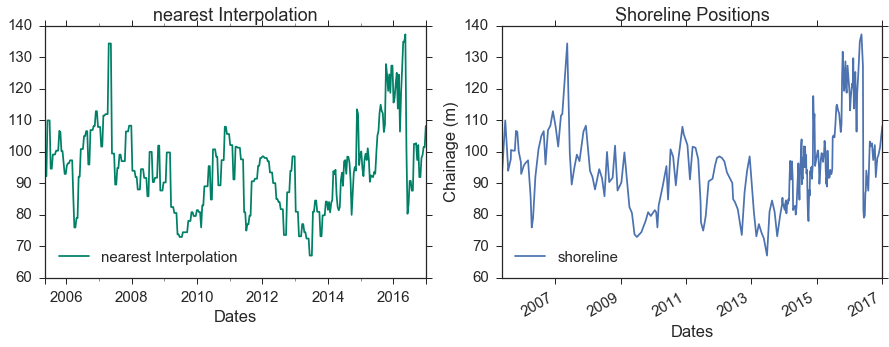

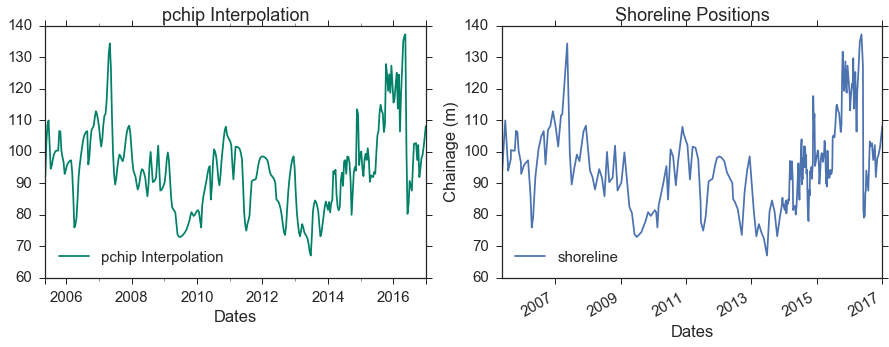

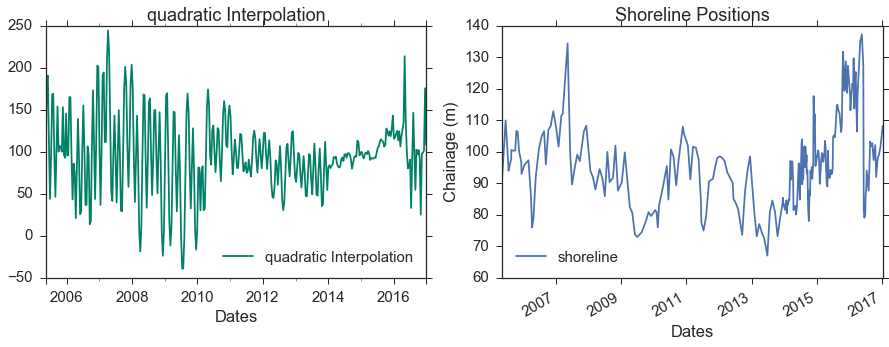

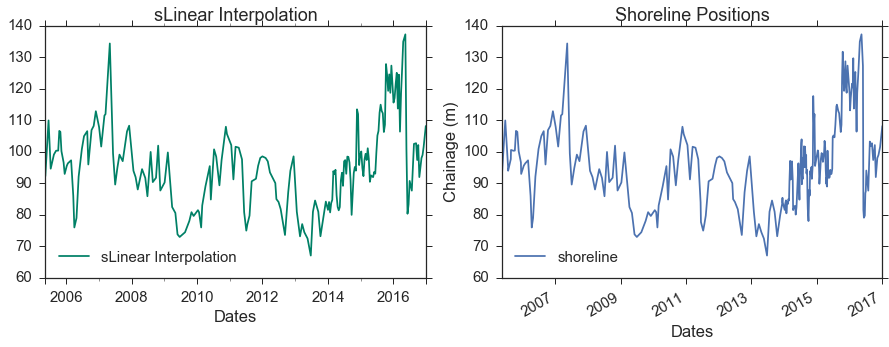

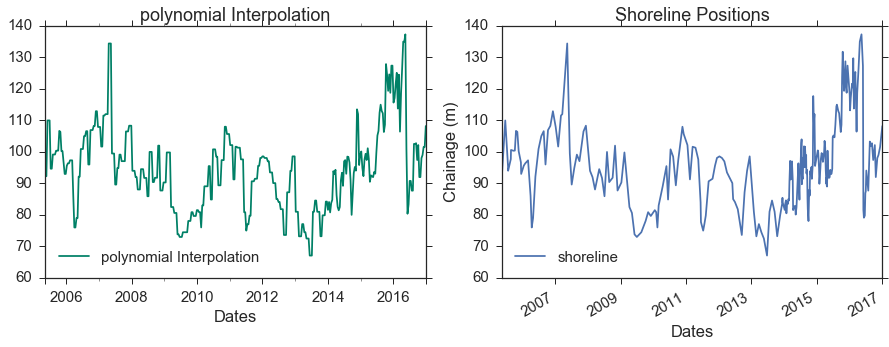

In [8]:
# InterpolationMethod accepts the dataframe and the resampling method and implements it all.
# It prints out the types of available interpolation and prompts the user for the desired 
# interpolation. To view all of the types and how the shoreline positions differ, type 'all'

interpolationMethod(shoreline[320:],'12D')